# House Pricing
    Estimate the real price using regression models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
house_it6_regression = pd.read_csv("C:/Users/Irene/Desktop/Bootcamp/Data_Science_Project6_SML/7.4.1.6.5_housing_iteration_6_regression/housing_iteration_6_regression/housing_iteration_6_regression.csv")
pd.set_option('display.max_columns', None)
house_it6_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
house_it6_regression.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking for missing values
missing_values = house_it6_regression.isnull().sum()

# Filter only columns with missing values
missing_columns = missing_values[missing_values > 0]

# Checking for duplicated rows
duplicated_rows = house_it6_regression.duplicated().sum()

print("Missing Values:\n", missing_columns)
print("\nDuplicated Rows:", duplicated_rows)

Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Duplicated Rows: 0


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

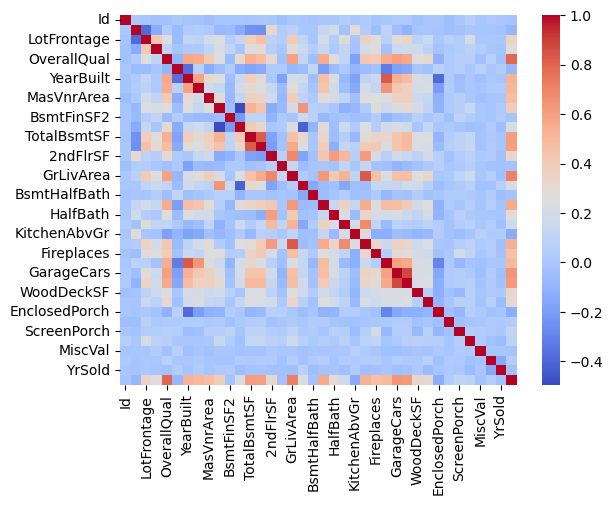

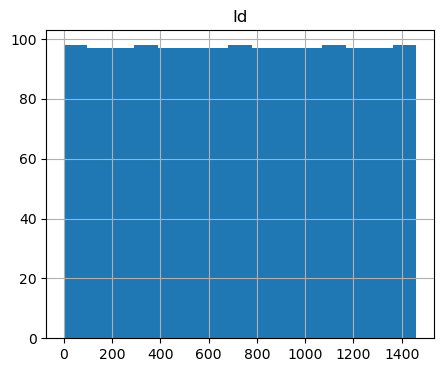

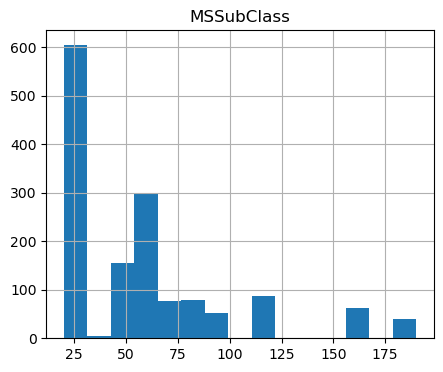

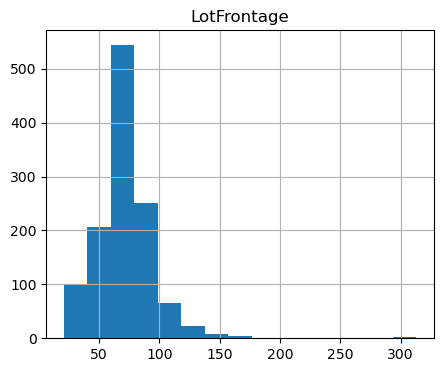

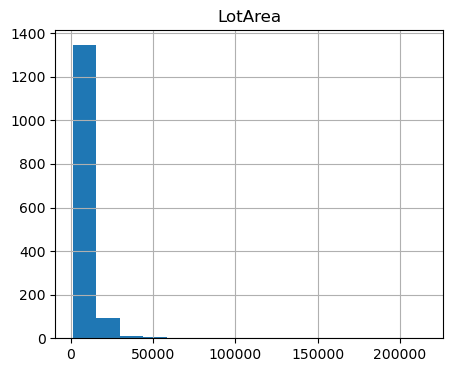

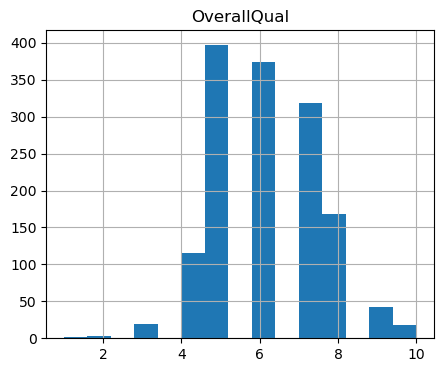

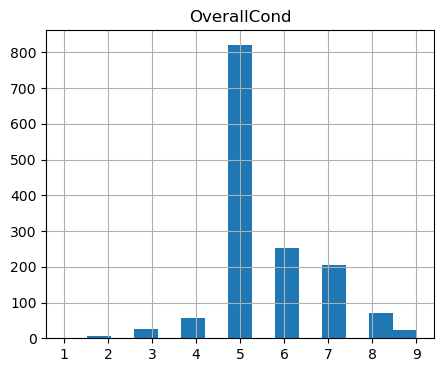

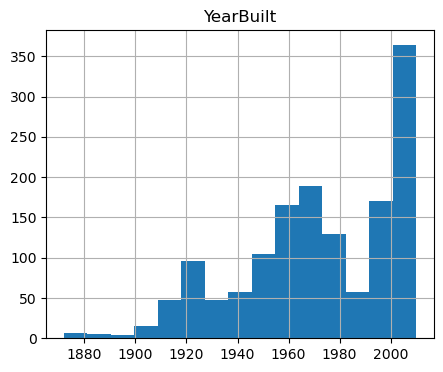

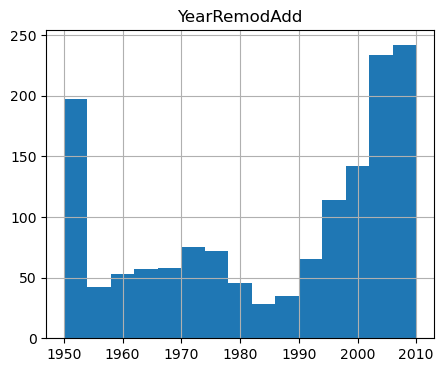

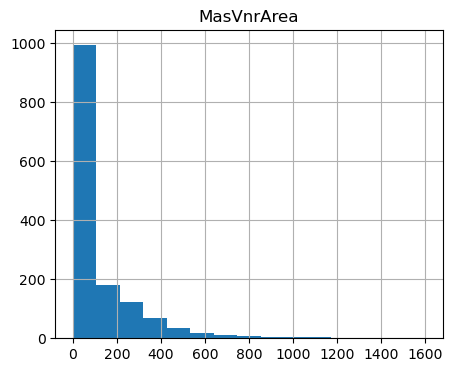

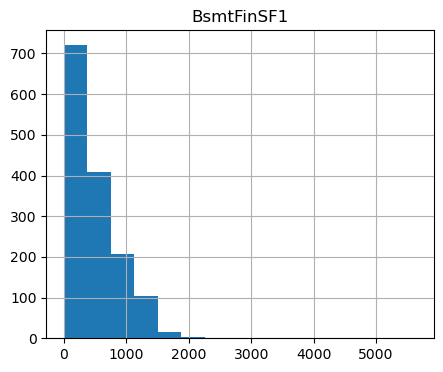

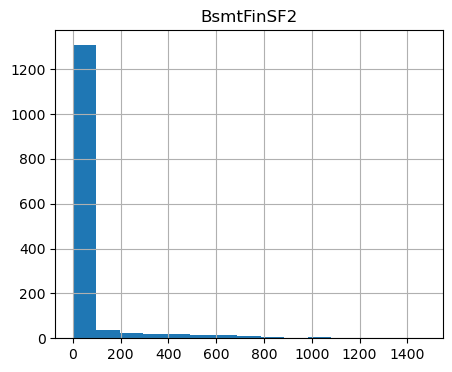

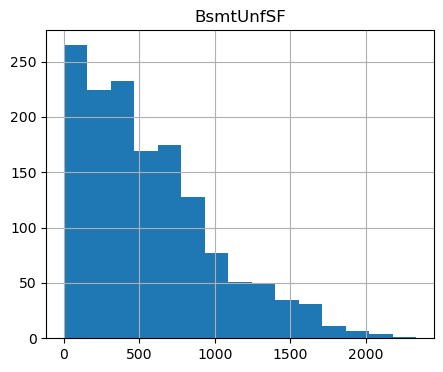

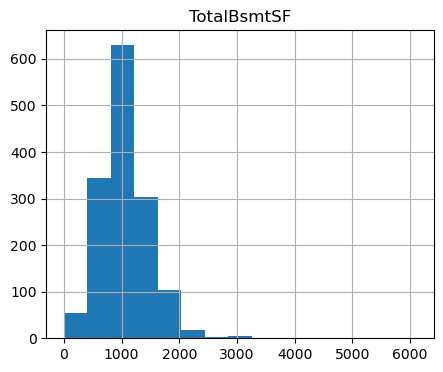

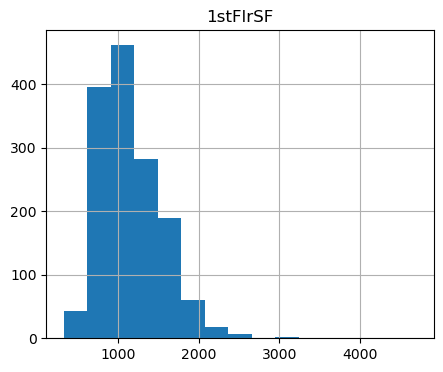

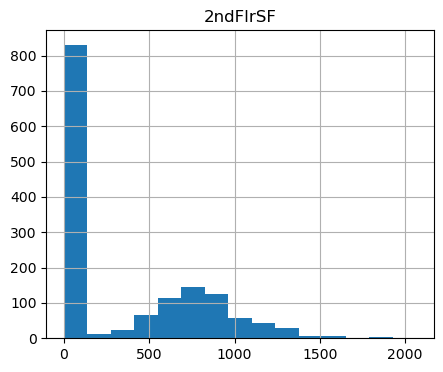

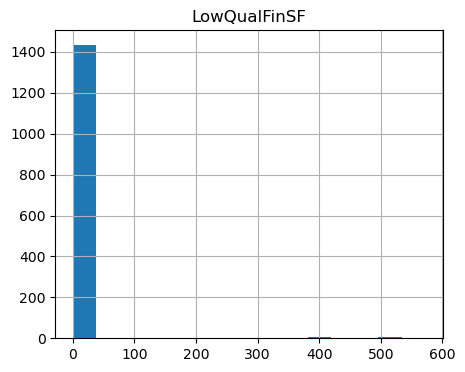

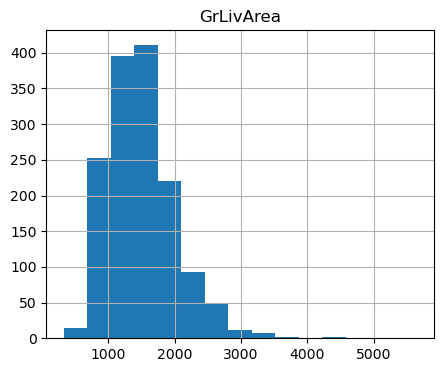

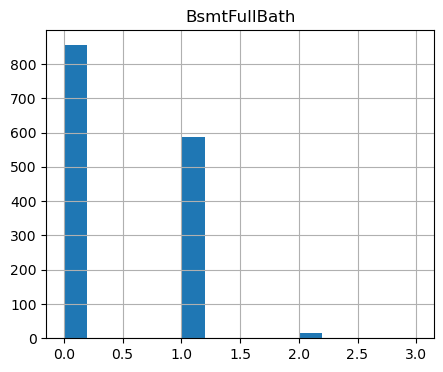

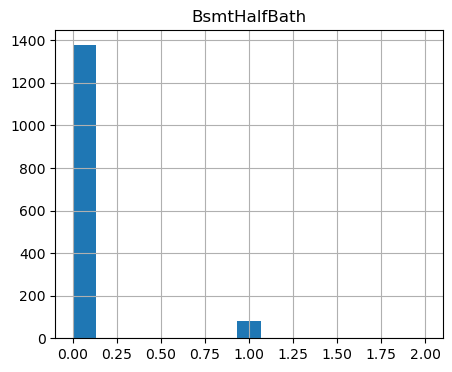

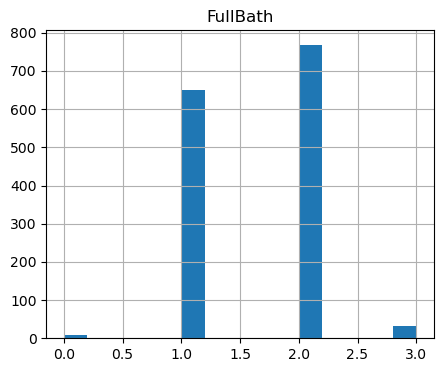

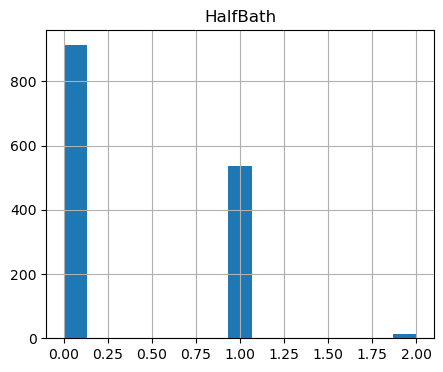

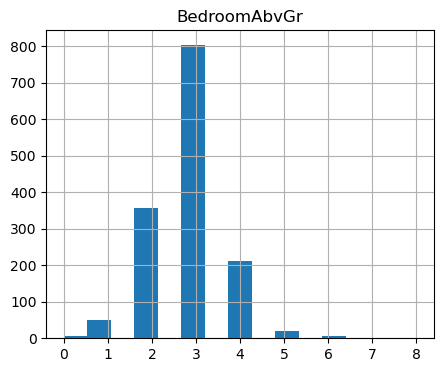

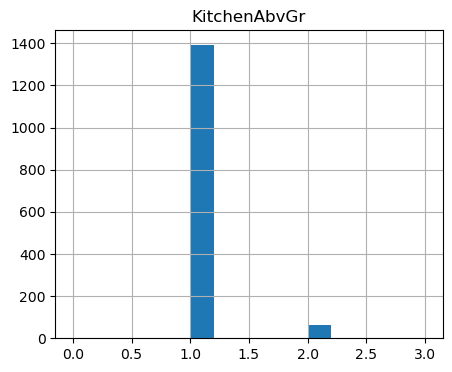

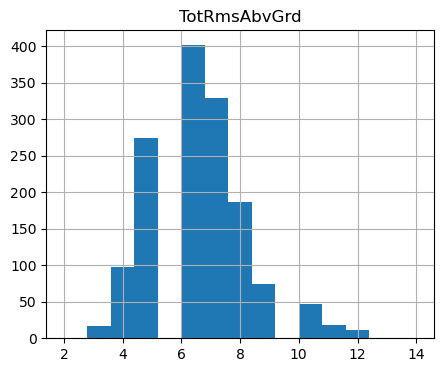

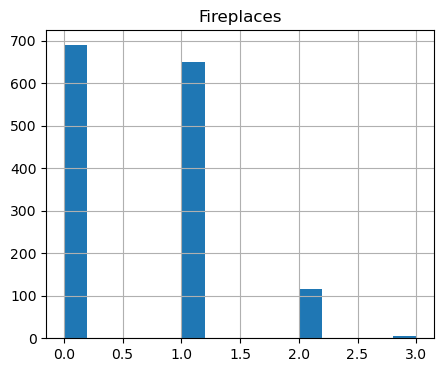

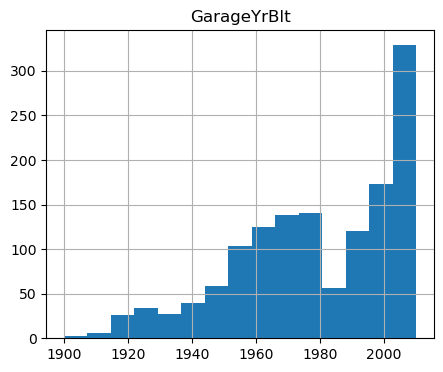

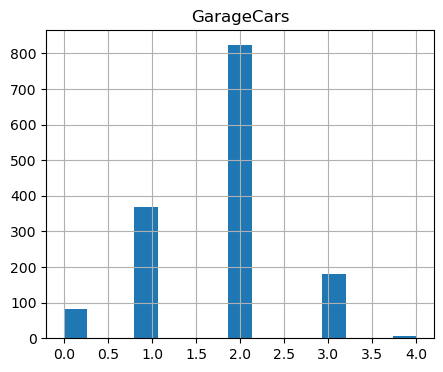

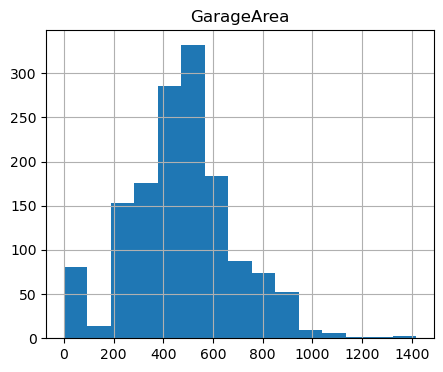

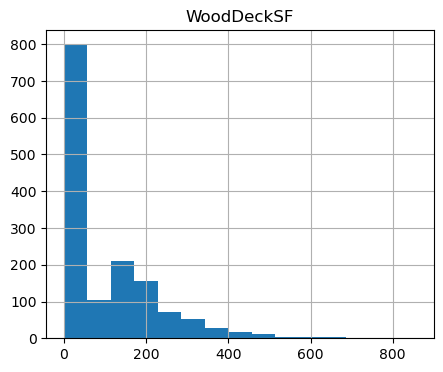

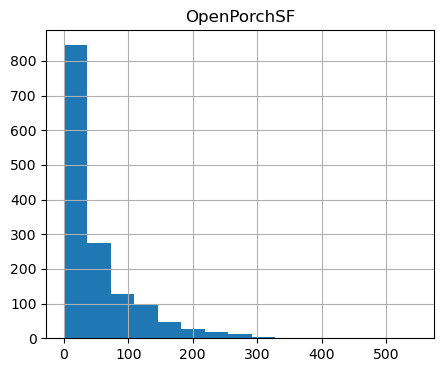

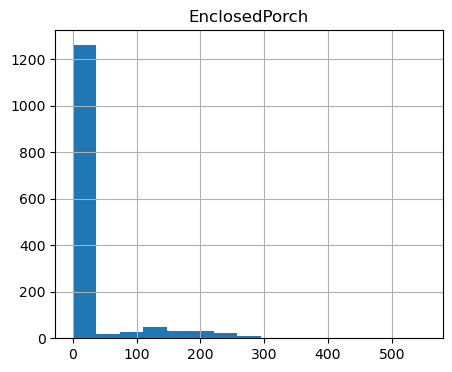

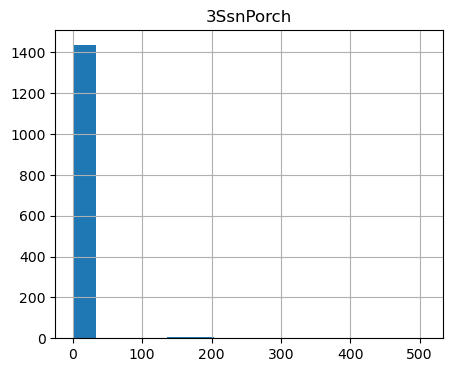

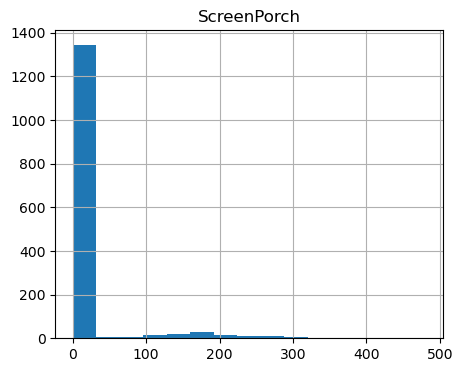

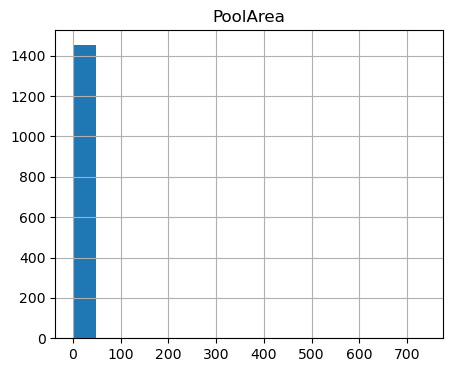

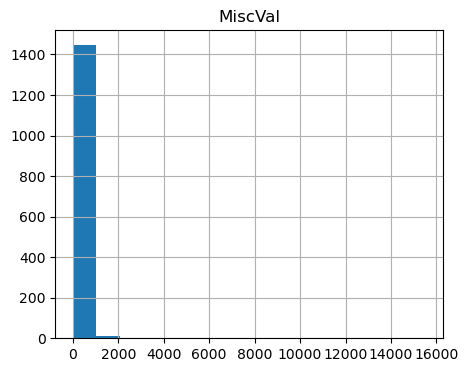

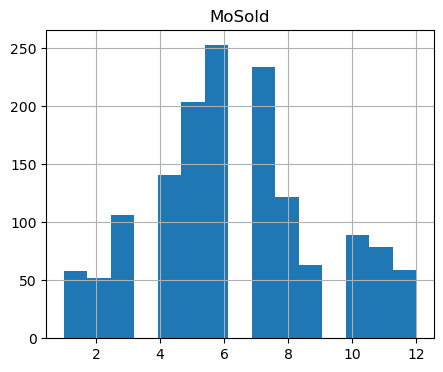

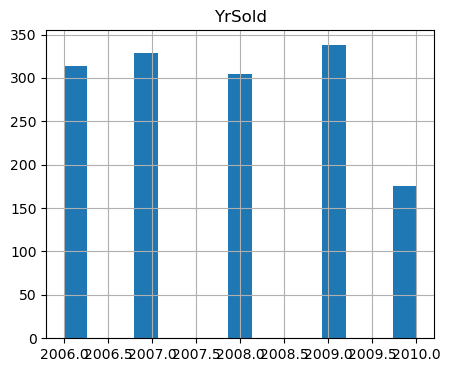

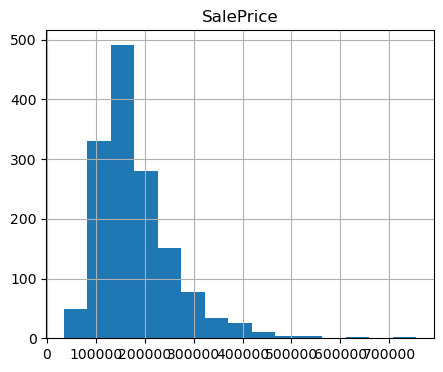

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print(house_it6_regression.describe())  # Numerical features
print(house_it6_regression.describe(include=['O']))  # Categorical features

# Check for Missing Values
missing_values = house_it6_regression.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for Duplicated Values
duplicates = house_it6_regression.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

# Correlation Analysis for numerical features
correlation_matrix = house_it6_regression.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Adjusting Histograms to fit all numerical variables
# Select numerical columns and plot histograms
numerical_columns = house_it6_regression.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(5, 4))
    house_it6_regression[column].hist(bins=15)
    plt.title(column)
    plt.show()

Numerical Features:

    Continuous: LotFrontage, LotArea, and SalePrice are examples of continuous numerical features that represent measurements or counts.
    Discrete: MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold are discrete numerical features that indicate quantities.

Categorical Features:

    Nominal: MSZoning, Street, Alley, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, Functional, GarageType, PavedDrive, MiscFeature, SaleType, SaleCondition represent nominal categorical variables where there is no inherent order.
    Binary: Derived from nominal features, indicating presence or absence, such as CentralAir (Y or N).

Ordinal Features:

    Features that represent categories with a meaningful order or ranking but not necessarily equidistant. Examples include LotShape, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence. These variables often require encoding to convert them into numerical format for machine learning models to process effectively.

# X and Y Creation & Data Splitting

   Here we use the column SalePrice as the label 

In [6]:
#X and y creation
x = house_it6_regression.drop(columns=['Id'])
y = x.pop("SalePrice")

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Pipeline 

In [7]:
#Select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

#Create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer())
 
#Create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

#Created the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns), #1 branch called "num_pipe", will apply the steps in the numeric_pipe to the columns named in x_num_columns
        ("cat_pipe", categoric_pipe, x_cat_columns), #2 branch called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in x_cat_columns
    ]
)



## Decision tree regression 

In [8]:
# Creating the full pipeline
pipeline_Decisiontreeregression = make_pipeline(preprocessor, 
                              DecisionTreeRegressor()).set_output(transform='pandas')

In [9]:
pipeline_Decisiontreeregression.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [10]:
#Pipeline predict
pipeline_Decisiontreeregression.predict(x_train)

array([260000., 181900., 272000., ..., 262500., 133000., 131000.])

In [11]:
#Create parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14),
    "decisiontreeregressor__min_samples_leaf": range(3, 10),
    "decisiontreeregressor__criterion": ['friedman_mse', 'squared_error', 'poisson'],
    "decisiontreeregressor__splitter": ["best", "random"]
}

In [12]:
#Define cross validation
search = GridSearchCV(pipeline_Decisiontreeregression,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [13]:
#Fit the cross validation grid search 
search.fit(x_train, y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stF...
                                        DecisionTreeRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeregressor__criterion': ['friedman_mse',
                                                              'squared_error',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': range(2, 14),
                         'decisiontreeregressor__min_samples_leaf': range(3, 10),
                         'decisiontreeregressor__splitter': ['best', 'random']},
             verbose=1)

In [15]:
#Creating a pipeline transforming the data probably because we use variance 
pipeline = make_pipeline(preprocessor,
                         MinMaxScaler()).set_output(transform='pandas') # Initialize the scaler and then scales all features to a range between 0 and 1 using MinMaxScaler()

#Use the pipeline created above to fit and transform the train data 
x_train_trans_fit = pipeline.fit_transform(x_train, y_train)

#Transform the test set
x_test_trans_fit = pipeline.transform(x_test)

In [16]:
treeregression = DecisionTreeRegressor()
treeregression.fit(x_train_trans_fit, y_train)

DecisionTreeRegressor()

## K Neighbors Regressor

In [17]:
treeknn = KNeighborsRegressor(n_neighbors=1)
treeknn.fit(x_train_trans_fit, y_train)

KNeighborsRegressor(n_neighbors=1)

## Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression

full_pipeline_linear = make_pipeline(preprocessor, LinearRegression())

pipeline_LinearRegression = make_pipeline(preprocessor, 
                                          LinearRegression()).set_output(transform='pandas')

In [132]:
# Tuning the pipeline to training data
pipeline_LinearRegression.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsm...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [133]:
pipeline_LinearRegression.predict(x_train)

array([322417.41183771, 188579.57658424, 274024.48706776, ...,
       269178.85757925, 137135.01788559, 130304.0937008 ])

In [134]:
# Parameter grid for Linear Regression
param_grid_linear = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "linearregression__fit_intercept": [True, False]
}

# Create grid search
search_linear = GridSearchCV(full_pipeline_linear,
                      param_grid_linear,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

# Fit 
search_linear.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stF...
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'linearregression__fit_intercept': [True, False]},
             verbose=1)

In [135]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_linear.best_params_)

Best parameters found by RandomizedSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'linearregression__fit_intercept': True}


In [136]:
search_linear.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

## Random Forest Regression 

In [137]:
full_pipeline_RF = make_pipeline(preprocessor, RandomForestRegressor())

pipeline_RandomForestRegressor = make_pipeline(preprocessor, 
                                               RandomForestRegressor()).set_output(transform='pandas')

In [138]:
# Tuning the pipeline to training data
pipeline_RandomForestRegressor.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [139]:
pipeline_RandomForestRegressor.predict(x_train)

array([275233.4 , 177069.5 , 261145.  , ..., 252154.29, 132864.  ,
       129036.04])

In [140]:
# Parameter grid for Random Forest Regression
param_grid_random_forest = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "randomforestregressor__n_estimators": [50, 100],
    "randomforestregressor__max_depth": [None, 10],
    "randomforestregressor__min_samples_split": [2, 5],
    "randomforestregressor__min_samples_leaf": [1, 2]
}

# Reduce the number of folds for cross-validation
cv = 3

# Create GridSearchCV with reduced parameters
search_RF = GridSearchCV(full_pipeline_RF,
                         param_grid_random_forest,
                         cv=cv,
                         verbose=1,
                         error_score='raise')
# Fit 
search_RF.fit(x_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stF...
      dtype='object'))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'randomforestregressor__max_depth': [None, 10],
                         'randomforestregressor__min_samples_leaf': [1, 2],
                         'randomforestregressor__min_samples_split': [2, 5],
                         'randomforestregressor__n_estimators': [50, 100]},
             verbose=1)

In [141]:
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(search_RF.best_params_)

Best parameters found by RandomizedSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 50}


In [145]:
search_RF.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(min_samples_split=5, n_estimators=50))])

## Model performance assesment

In [146]:
treeregression_pred = treeregression.predict(x_test_trans_fit)
treeknn_pred = treeknn.predict(x_test_trans_fit)


In [149]:
# Directly predict without manually transforming the test set
predict_linear = pipeline_LinearRegression.predict(x_test)
predict_RF = pipeline_RandomForestRegressor.predict(x_test)


In [155]:
# Assuming predict_linear and predict_RF contain the predictions from the linear regression and random forest models, respectively
predict_linear_r2 = r2_score(y_test, predict_linear)  # Fixed to use correct predictions variable
predict_RF_r2 = r2_score(y_test, predict_RF)

# Creating the performances DataFrame
performances = pd.DataFrame({
    'decision_tree': [treeregression_r2],
    'knn': [treeknn_r2],
    'linear': [predict_linear_r2],
    'RF': [predict_RF_r2]
}, index=['transformed_MaxMin'])


performances

,decision_tree,knn,linear,RF
transformed_MaxMin,0.728127,0.631138,0.897963,0.876732


In [20]:
#Root mean squared error score  Tree regression
from sklearn.metrics import mean_squared_log_error
rmse_score = mean_squared_log_error(y_test, treeregression_pred)
rmse_score

0.042369988867418

In [21]:
#Root mean squared error score Tree Knn
rmse_score = mean_squared_log_error(y_test, treeknn_pred)
rmse_score

0.05138194971460673

In [157]:
#Root mean squared error score Linear regression
rmse_score = mean_squared_log_error(y_test, predict_linear)
rmse_score

0.016448737788694698

In [158]:
#Root mean squared error score Random forest
rmse_score = mean_squared_log_error(y_test, predict_RF)
rmse_score

0.017476733677224913

## Variance Threshold

In [38]:
range_var_df = (pd.DataFrame({
                'Range': x_train_trans_fit.max() - x_train_trans_fit.min(),
                'Variance': x_train_trans_fit.var()})
                .sort_values(by='Variance'))

In [39]:
range_var_df.tail()

,Range,Variance
cat_pipe__BsmtQual_TA,1.0,0.247302
cat_pipe__FireplaceQu_N_A,1.0,0.249597
cat_pipe__HeatingQC_Ex,1.0,0.250090
cat_pipe__KitchenQual_TA,1.0,0.250167
cat_pipe__HouseStyle_1Story,1.0,0.250196


In [40]:
range_var_df.head()

,Range,Variance
cat_pipe__RoofMatl_Metal,1.0,0.000856
cat_pipe__MiscFeature_Othr,1.0,0.000856
cat_pipe__Heating_Floor,1.0,0.000856
cat_pipe__ExterCond_Po,1.0,0.000856
cat_pipe__MiscFeature_TenC,1.0,0.000856


In [41]:
selector = VarianceThreshold(threshold=0.002)

x_train_var = selector.fit_transform(x_train_trans_fit)

In [42]:
# Apply the variance threshold to the scaled test set
x_test_var = selector.transform(x_test_trans_fit)

In [43]:
print("shape before:", x_train_trans_fit.shape)
print("shape after:", x_train_var.shape)

shape before: (1168, 301)
shape after: (1168, 262)


In [44]:
# Decision tree.
var_tree = DecisionTreeRegressor()
var_tree.fit(x_train_var, y_train)
var_tree_pred = var_tree.predict(x_test_var)

# K-Nearest Neighbors.
var_knn = KNeighborsRegressor(n_neighbors=1)
var_knn.fit(x_train_var, y_train)
var_knn_pred = var_knn.predict(x_test_var)

performances.loc["varThreshold_0_02", "decision_tree"] = r2_score(y_test, var_tree_pred)
performances.loc["varThreshold_0_02", "knn"] = r2_score(y_test, var_knn_pred)

performances

,decision_tree,knn
transformed_MaxMin,0.728127,0.631138
varThreshold_0_02,0.718889,0.675839


## Droping highly correlated features

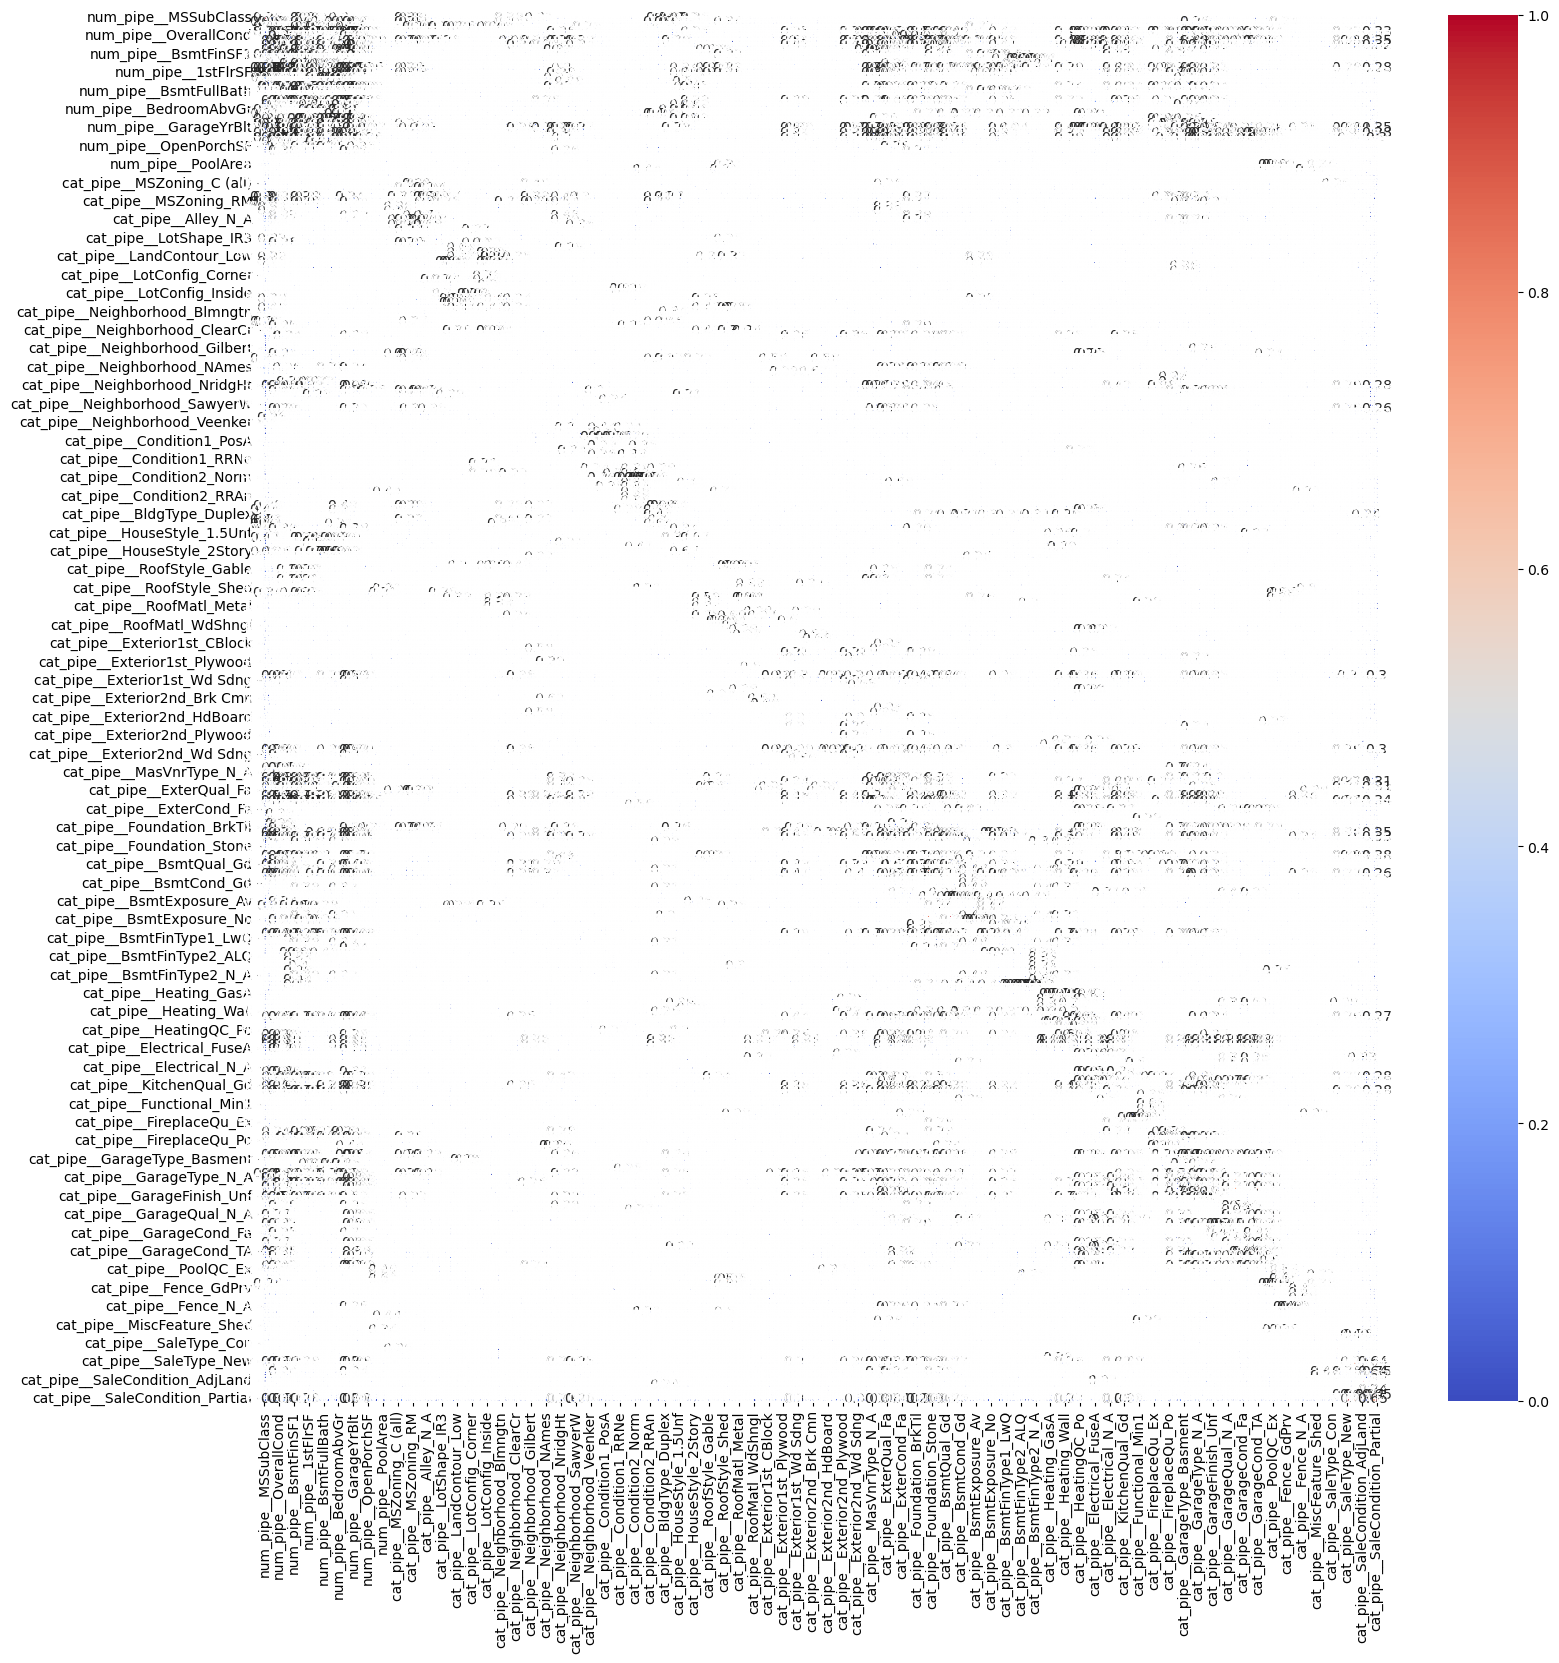

In [45]:
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = x_train_trans_fit.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

# Create a heatmap using Seaborn (sns) to visualize the correlation matrix
# 'annot=True' adds the correlation values to the cells for better readability
# 'cmap='coolwarm'' specifies the color map to be used, with warm colors (red) for positive correlations
# and cool colors (blue) for negative correlations
# 'linewidths' sets the width of the white lines around the squares
sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5);

In [46]:
# Set the correlation threshold to consider columns as highly correlated
correlation_threshold = 0.95

# Initialise an empty list to store the pairs of highly correlated columns
highly_correlated_columns = []

# Get the number of features (columns) in the correlation matrix
num_features = len(corrMatrix.columns)

# Loop through the upper triangle of the correlation matrix to find highly correlated columns
# Note: We start from i+1 to avoid redundancy as correlation_matrix is symmetric
for i in range(num_features):
    for j in range(i + 1, num_features):
        # Check if the correlation value between columns i and j is greater than or equal to the threshold
        if corrMatrix.iloc[i, j] >= correlation_threshold:
            # Append the tuple (column_i, column_j) to the list of highly correlated columns
            highly_correlated_columns.append((corrMatrix.columns[i], corrMatrix.columns[j], f"correlation = {round(corrMatrix.iloc[i, j], 2)}"))

# Print the pairs of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns)

Highly correlated columns: [('num_pipe__PoolArea', 'cat_pipe__PoolQC_N_A', 'correlation = 0.99'), ('cat_pipe__Street_Grvl', 'cat_pipe__Street_Pave', 'correlation = 1.0'), ('cat_pipe__Utilities_AllPub', 'cat_pipe__Utilities_NoSeWa', 'correlation = 1.0'), ('cat_pipe__Exterior1st_CBlock', 'cat_pipe__Exterior2nd_CBlock', 'correlation = 1.0'), ('cat_pipe__Exterior1st_CemntBd', 'cat_pipe__Exterior2nd_CmentBd', 'correlation = 0.98'), ('cat_pipe__Exterior1st_MetalSd', 'cat_pipe__Exterior2nd_MetalSd', 'correlation = 0.97'), ('cat_pipe__Exterior1st_VinylSd', 'cat_pipe__Exterior2nd_VinylSd', 'correlation = 0.98'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtCond_N_A', 'correlation = 1.0'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtExposure_N_A', 'correlation = 0.98'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtFinType1_N_A', 'correlation = 1.0'), ('cat_pipe__BsmtQual_N_A', 'cat_pipe__BsmtFinType2_N_A', 'correlation = 1.0'), ('cat_pipe__BsmtCond_N_A', 'cat_pipe__BsmtExposure_N_A', 'correlation = 0.98

In [47]:
to_drop = [element_a for element_a, element_b, element_c in highly_correlated_columns]
to_drop

['num_pipe__PoolArea',
 'cat_pipe__Street_Grvl',
 'cat_pipe__Utilities_AllPub',
 'cat_pipe__Exterior1st_CBlock',
 'cat_pipe__Exterior1st_CemntBd',
 'cat_pipe__Exterior1st_MetalSd',
 'cat_pipe__Exterior1st_VinylSd',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtQual_N_A',
 'cat_pipe__BsmtCond_N_A',
 'cat_pipe__BsmtCond_N_A',
 'cat_pipe__BsmtCond_N_A',
 'cat_pipe__BsmtExposure_N_A',
 'cat_pipe__BsmtExposure_N_A',
 'cat_pipe__BsmtFinType1_N_A',
 'cat_pipe__CentralAir_N',
 'cat_pipe__GarageType_N_A',
 'cat_pipe__GarageType_N_A',
 'cat_pipe__GarageType_N_A',
 'cat_pipe__GarageFinish_N_A',
 'cat_pipe__GarageFinish_N_A',
 'cat_pipe__GarageQual_Ex',
 'cat_pipe__GarageQual_N_A',
 'cat_pipe__MiscFeature_N_A',
 'cat_pipe__SaleType_New']

In [48]:
# Drop the columns from the train set.
x_train_corr = x_train_trans_fit.drop(columns=to_drop).copy()

# Drop the columns from the test set.
x_test_corr = x_test_trans_fit.drop(columns=to_drop).copy()

In [49]:
# Decision tree.
corr_tree = DecisionTreeRegressor()
corr_tree.fit(x_train_corr, y_train)
corr_tree_pred = corr_tree.predict(x_test_corr)

# K-Nearest Neighbors.
corr_knn = KNeighborsRegressor(n_neighbors=1)
corr_knn.fit(x_train_corr, y_train)
corr_knn_pred = corr_knn.predict(x_test_corr)

performances.loc["collinearity", "decision_tree"] = r2_score(y_test, corr_tree_pred)
performances.loc["collinearity", "knn"] = r2_score(y_test, corr_knn_pred)

performances

,decision_tree,knn
transformed_MaxMin,0.728127,0.631138
varThreshold_0_02,0.718889,0.675839
collinearity,0.736031,0.643670


## K-Best

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression

In [51]:
#Creating a pipeline #Initialize KBest, using the f-regression and setting k=10.
pipeline_kbest = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               SelectKBest(score_func=f_regression, k=10)).set_output(transform='pandas')

In [52]:
#Use the pipeline created above to fit and transform the train data 
x_train_kbest = pipeline_kbest.fit_transform(x_train, y_train)

#Transform the test set
x_test_kbest = pipeline_kbest.transform(x_test)

In [53]:
#Store the decision tree
tree = DecisionTreeRegressor()
#Fit the decicion tree 
tree.fit(x_train_kbest, y_train)
#Predict the test data 
tree_pred_kbest = tree.predict(X = x_test_kbest)

In [54]:
#Store the K-Nearest Neighbor
neigh = KNeighborsRegressor(n_neighbors=12)
#Fit 
neigh.fit(x_train_kbest, y_train)
#Predict the test data 
knn_pred_kbest = neigh.predict(X = x_test_kbest)

In [55]:
performances.loc["KBest_10", "decision_tree"]= r2_score(y_test, tree_pred_kbest)
performances.loc["KBest_10", "knn"] = r2_score(y_test, knn_pred_kbest)

performances

,decision_tree,knn
transformed_MaxMin,0.728127,0.631138
varThreshold_0_02,0.718889,0.675839
collinearity,0.736031,0.643670
KBest_10,0.757981,0.827415


In [56]:
#Creating a pipeline #Initialize KBest, using the f-regression and setting k=10.
pipeline_rfe_tree = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               RFECV(DecisionTreeRegressor()).set_output(transform='pandas'))

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Fit and transform the training data with the pipeline.
x_train_rfe_tree = pipeline_rfe_tree.fit_transform(x_train, y_train)

# Transform the test data with the pipeline.
x_test_rfe_tree = pipeline_rfe_tree.transform(x_test)

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit the model on the transformed training set.
model.fit(x_train_rfe_tree, y_train)

# Make predictions on the transformed test set.
predictions = model.predict(x_test_rfe_tree)

# Calculate the R-squared score using the actual and predicted values.
r2 = r2_score(y_test, predictions)


In [86]:
model = KNeighborsRegressor(n_neighbors=1)
# Fit the model on the transformed training set.
model.fit(x_train_rfe_tree, y_train)

# Make predictions on the transformed test set.
predictions = model.predict(x_test_rfe_tree)

# Calculate the R-squared score using the actual and predicted values.
r2 = r2_score(y_test, predictions)



In [88]:
performances.drop(columns=['Knn', 'rf'], inplace=True, errors='ignore') 

In [89]:
performances.loc["RFE", "decision_tree"] = r2_score(y_test, tree_pred_kbest)
performances.loc["RFE", "knn"] = r2_score(y_test, knn_pred_kbest)


In [90]:
performances

,decision_tree,knn
transformed_MaxMin,0.728127,0.631138
varThreshold_0_02,0.718889,0.675839
collinearity,0.736031,0.643670
KBest_10,0.757981,0.827415
RFE,0.757981,0.827415
model_selected,0.695388,0.818742


In [91]:
from sklearn.ensemble import RandomForestRegressor
feature_selector = SelectFromModel(estimator=RandomForestRegressor())
pipeline_selmod_rf = make_pipeline(preprocessor,
                               MinMaxScaler(),
                                feature_selector)


## Select from model 

In [99]:
# Creating a pipeline for Tree, KNN, Linear and SRV
pipeline_select_model_tree = make_pipeline(preprocessor,
                               MinMaxScaler(),
                               SelectFromModel(estimator=DecisionTreeRegressor(), 
                                               threshold=None).set_output(transform='pandas')) 

In [100]:
# Transform the train set
x_train_select_model_tree = pipeline_select_model_tree.fit_transform(x_train, y_train)

# Transform the test data with the pipeline.
x_test_select_model_tree = pipeline_select_model_tree.transform(x_test)

In [101]:
# Show shape of the train and test dataset to check for the number of features kept.
print(x_train_select_model_tree.shape, x_test_select_model_tree.shape)

(1168, 21) (292, 21)


In [102]:
pipeline_select_model_tree.get_feature_names_out()

array(['num_pipe__LotFrontage', 'num_pipe__LotArea',
       'num_pipe__OverallQual', 'num_pipe__OverallCond',
       'num_pipe__YearBuilt', 'num_pipe__YearRemodAdd',
       'num_pipe__BsmtFinSF1', 'num_pipe__BsmtUnfSF',
       'num_pipe__TotalBsmtSF', 'num_pipe__1stFlrSF',
       'num_pipe__2ndFlrSF', 'num_pipe__LowQualFinSF',
       'num_pipe__GrLivArea', 'num_pipe__KitchenAbvGr',
       'num_pipe__GarageYrBlt', 'num_pipe__GarageCars',
       'num_pipe__GarageArea', 'num_pipe__MoSold',
       'cat_pipe__BsmtQual_Ex', 'cat_pipe__BsmtFinType1_ALQ',
       'cat_pipe__GarageType_Detchd'], dtype=object)

In [103]:
# Decision Tree Model
select_model_rf = RandomForestRegressor()
select_model_rf.fit(x_train_selmod_rf, y_train)  # Train on the correct training set
select_model_rf_pred = select_model_rf.predict(x_test_selmod_rf)  # Predict on the test set


In [104]:
x_train_selmod_rf = pipeline_selmod_rf.fit_transform(x_train, y_train)
# Transform the test data with the pipeline.
x_test_selmod_rf = pipeline_selmod_rf.transform(x_test)

In [105]:
# Corrected: Use the RandomForestRegressor for predictions
select_model_rf_pred = select_model_rf.predict(x_test_selmod_rf)

# Calculate the R-squared score using the actual and predicted values from the correct model
r2 = r2_score(y_test, select_model_rf_pred)

# Assuming 'performances' DataFrame exists and you want to update it
performances.loc["FeatureSelection_RF", "random_forest"] = r2

# Display the updated performances DataFrame
print(performances)


                     decision_tree       knn  random_forest
transformed_MaxMin        0.728127  0.631138            NaN
varThreshold_0_02         0.718889  0.675839            NaN
collinearity              0.736031  0.643670            NaN
KBest_10                  0.757981  0.827415            NaN
RFE                       0.757981  0.827415            NaN
model_selected            0.695388  0.818742            NaN
FeatureSelection_RF            NaN       NaN       0.879052


In [106]:
#Root mean squared error score 
from sklearn.metrics import mean_squared_log_error
rmse_score = mean_squared_log_error(y_test, select_model_rf_pred)
rmse_score

0.01697389301670897

In [107]:
#Creating a pipeline #Initialize KBest, using the f-regression and setting k=10.
pipeline_kbest_rf = make_pipeline(preprocessor,
                                  MinMaxScaler(),
                                  SelectKBest(score_func=f_regression, k=10)).set_output(transform='pandas')

In [108]:
#Use the pipeline created above to fit and transform the train data 
x_train_kbest_rf = pipeline_kbest_rf.fit_transform(x_train, y_train)

#Transform the test set
x_test_kbest_rf = pipeline_kbest_rf.transform(x_test)

In [109]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X = x_train_kbest, y = y_train)
rf_pred_kbest = rf.predict(X = x_test_kbest)

In [110]:
#Create parameter grid
param_grid = {
    "n_estimators": range(90,105),
    "max_features": ["sqrt"], 
    "max_depth":range(14,16),
}

In [111]:
from sklearn.model_selection import GridSearchCV
#Define cross validation
search_rf = GridSearchCV(rf,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [112]:
search_rf.fit(X = x_train_kbest_rf, y = y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(14, 16), 'max_features': ['sqrt'],
                         'n_estimators': range(90, 105)},
             verbose=1)

In [114]:
search_rf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 90}

In [115]:
serach_predict_rf = search_rf.predict(X = x_test_kbest)

#Root mean squared error score 
from sklearn.metrics import mean_squared_log_error
rmse_score = mean_squared_log_error(y_test, serach_predict_rf)
rmse_score

0.021969912745254876

In [79]:
submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission_df

In [ ]:
# full_pipeline.predict(X_test)

my_submission = (
submission_df
    .assign(SalePrice = full_pipeline.predict(submission_df))
    .filter(['Id','SalePrice'])
    .to_csv('submission.csv', index=False)
)
my_submission

